# Майнор "Интеллектуальный анализ данных", Введение в Анализ данных (ВШЭ). Семинар 6: наивный байесовский классификатор.

In [1]:
import numpy as np

In [2]:
import sklearn

### Сначала будем генерировать выборки

Проверим формулы, которые вывели для одномерного и многомерного нормального распределения. Для этого сгенериурем выборку, а затем оценим по ней параметры и сравним с исходными.

In [10]:
sample = np.random.normal(loc=1, scale=5, size=100)
mean = sample.mean()
scale = sample.var()

In [11]:
print mean, np.sqrt(scale)

1.29504115064 4.69066417971


Сравним результаты для выборок разных размеров:

In [14]:
for n in [100, 1000, 10000]:
    sample = np.random.normal(loc=1, scale=5, size=n)
    print sample.mean(), np.sqrt(sample.var())

1.63494654976 5.18874142728
1.04774609467 4.91974728409
0.991499974066 4.98018639024


Теперь то же самое для многомерного нормального распределения:

In [23]:
mean = np.array([5, 10])
cov = np.array([[1, 0.5], [0.5, 1]])
sample = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)
print sample.mean(axis=0)
print np.cov(sample.T)

[ 5.01372562  9.95863997]
[[ 1.06153599  0.54775901]
 [ 0.54775901  0.99521216]]


In [49]:
mean = np.array([9, 5])
cov = np.array([[15, 10], [10, 15]])
sample1 = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)

Многомерное нормальное распределение представляет собой облако точек в пространстве; на плоскости это выглядит как овал. За его вытянутость и форму отвечает матрица ковариаций, а за центр --- среднее.

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

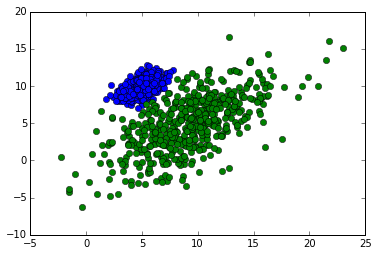

In [52]:
plt.plot(sample[:500, 0], sample[:500, 1], "bo")
plt.plot(sample1[:500, 0], sample1[:500, 1], "go")

Если объекты выборки образуют такие же отличимые облака в пространстве признаков, то нормальный байесовский классификатор будет очень хорошо работать на данной задаче.

Так же можно генерировать выборки из других распределений: см. документацию np.random. На больших выборках гистограмма хорошо приближает настоящую плотность или функцию вероятности, пример с кодом [здесь](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.normal.html)

### Применяем NB  к классификацици цифр

В задаче классификации цифр признаки натуральные. На лекции рассказывали, что такие признаки хорошо моделируются мультиномиальным распределением. Попробуем применить нормальный и мультиномиальный наивные байесовские классификаторы.

In [1]:
# импортируем классификатор
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [2]:
# загружаем данные --- изображения цифр
from sklearn.datasets import load_digits
data = load_digits()

In [3]:
X = data.images
y = data.target

Посмотрим, что у нас за данные (нарисуем несколько изображений)

[0 1 2 3 4]


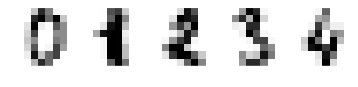

In [17]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i], cmap="Greys", interpolation="none")
    plt.axis("off")
print y[:5]

Мы видим, что у нас в выборке представлены пиксели изображений с цифрами, вытянутые в один вектор, а сами цифры, им соответствующие, в том же порядке записаны в целевом векторе y (и их конечное число --- 10). Нам надо предсказывать, какая цифра изображена, то есть решать задачу классификации.

In [57]:
X.shape

(1797L, 8L, 8L)

In [58]:
X = X.reshape(X.shape[0], -1) # вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки

Разделим выборку на обучение и контроль:

In [59]:
from sklearn.utils import shuffle

In [60]:
X, y = shuffle(X, y)

In [61]:
X.shape, y.shape # проверяем, что все хорошо перемешалось

((1797L, 64L), (1797L,))

In [62]:
X_train, y_train = X[:1000, :], y[:1000]
X_test, y_test = X[1000:, :], y[1000:]

In [71]:
# Обучаем классификатор и делаем предсказания
clf = GaussianNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [72]:
# Вычисляем простейшую метрику качества алгоритма --- долю правильных ответов
print "Accuracy is", np.mean(y_test==y_predicted)

Accuracy is 0.796737766625


C kNN было лучше: больше 0.95...

In [73]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print "Accuracy is", np.mean(y_test==y_predicted)

Accuracy is 0.902132998745


Почти дотянули. Итак, на задаче классификации цифр наивный байес проигрывает kNN. Возможно, здесь нужно другое распределение; например, пуассоновское.